# Machine Learning using Python Exam - Paper 2

## Part 1: Unsupervised Learning

### Importing Necessary Libraries

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

### Importing the Dataframe from csv

In [253]:
cc=pd.read_csv('credit_card.csv')
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### Creating a copy to work on

In [254]:
df=cc.copy()

In [255]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [256]:
df.drop('CUST_ID',axis=1,inplace=True)

## Q1) What does the primary analysis of several categorical features reveal? 

### Analyzing the columns using describe()

In [257]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


We can see that the minimum tenure is 6 years
There are customers with minimum balance 0
Some customers have never used their credit card as the minimum payment is 0

### Producing a correlation heatmap

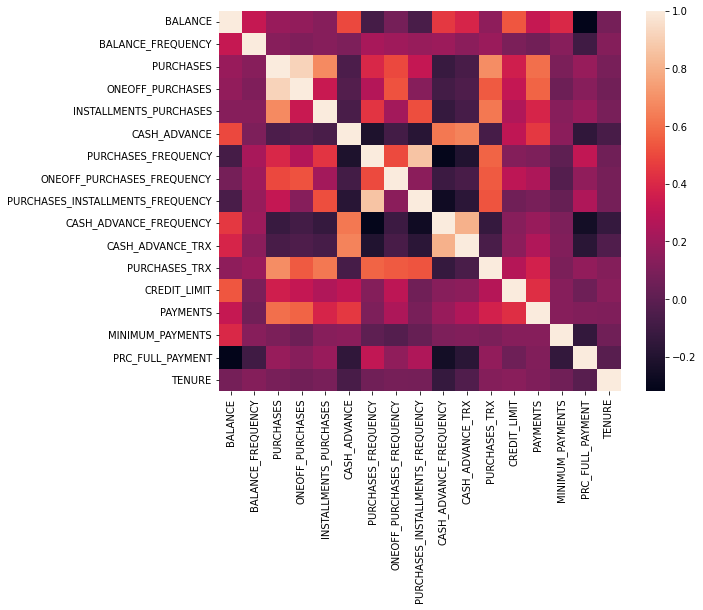

In [258]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr())
plt.show()

## Q2) Perform the following Exploratory Data Analysis tasks:

### a) Missing Value Analysis

In [259]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We can see that only the Credit_Limit and Minimum_Payments columns have missing values. Morover the Credit_Limit column has only 1 missing value so it's negligible.

### Visualizing the null values

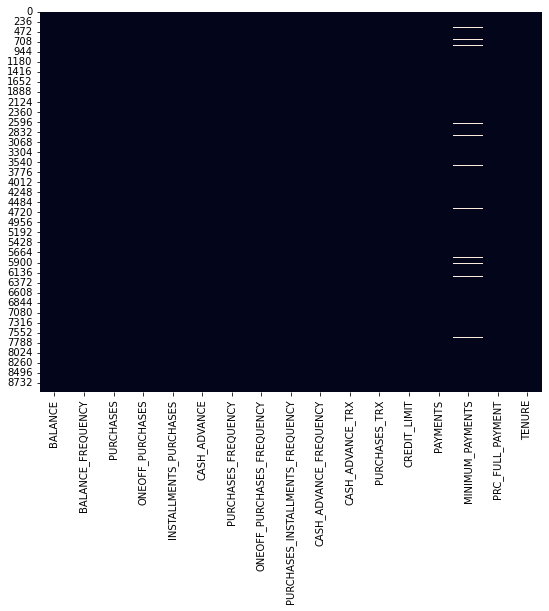

In [260]:
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

### Handling the missing values

In [261]:
df.MINIMUM_PAYMENTS.fillna(df.MINIMUM_PAYMENTS.median(),inplace=True)
df.dropna(inplace=True)

### Visualizing the null values after treatment

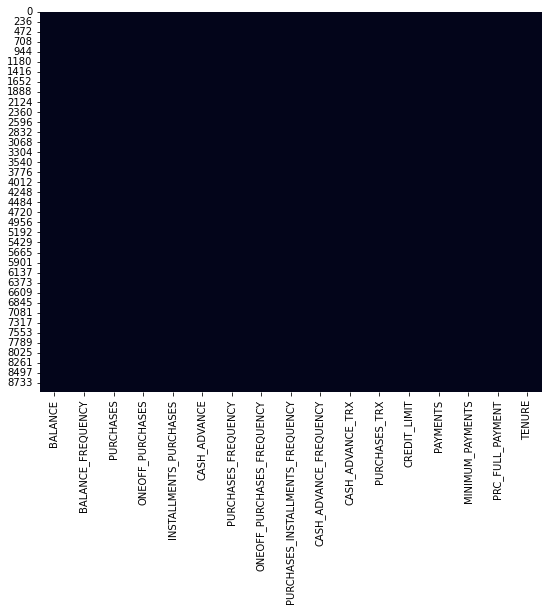

In [262]:
plt.figure(figsize=(9,7))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

We can see that there are no more null values

### b) Outlier Treatment using Z-Score Method

### Defining a function that automatically treats the outliers detected using Z-Score

In [263]:
def outlier(df,col):
    outliers=[]    
    threshold=3
    col_mean = np.mean(df[col])
    col_std =np.std(df[col])
    
    for y in df[col]:
        z_score= (y - col_mean)/col_std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    print('Number of outliers in this column ( ',col,' ): ',len(outliers)) 
    if len(outliers)>0:
        tenth_percentile = np.percentile(df[col], 10)
        ninetieth_percentile = np.percentile(df[col], 90)
        a = np.where(df[col]<tenth_percentile, tenth_percentile, df[col])
        b = np.where(a>ninetieth_percentile, ninetieth_percentile, a)
        df[col]=b
    outliers=[]    
    threshold=3
    col_mean = np.mean(df[col])
    col_std =np.std(df[col])
    
    for y in df[col]:
        z_score= (y - col_mean)/col_std 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    print('Number of outliers in this column ( ',col,' ) after treatment: ',len(outliers),'\n')

### Outlier treating every column

In [264]:
for col in df.columns:
    if df[col].dtype=='object':
        continue
    outlier(df,col)

Number of outliers in this column (  BALANCE  ):  196
Number of outliers in this column (  BALANCE  ) after treatment:  0 

Number of outliers in this column (  BALANCE_FREQUENCY  ):  182
Number of outliers in this column (  BALANCE_FREQUENCY  ) after treatment:  0 

Number of outliers in this column (  PURCHASES  ):  135
Number of outliers in this column (  PURCHASES  ) after treatment:  0 

Number of outliers in this column (  ONEOFF_PURCHASES  ):  122
Number of outliers in this column (  ONEOFF_PURCHASES  ) after treatment:  0 

Number of outliers in this column (  INSTALLMENTS_PURCHASES  ):  137
Number of outliers in this column (  INSTALLMENTS_PURCHASES  ) after treatment:  0 

Number of outliers in this column (  CASH_ADVANCE  ):  182
Number of outliers in this column (  CASH_ADVANCE  ) after treatment:  0 

Number of outliers in this column (  PURCHASES_FREQUENCY  ):  0
Number of outliers in this column (  PURCHASES_FREQUENCY  ) after treatment:  0 

Number of outliers in this c

## Q3) Dimensionality Reduction using PCA

In [273]:
pca=PCA(n_components=4)
df_pca=pca.fit_transform(df)
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2','PC3','PC4'])

In [274]:
df_pca.head()

,PC1,PC2,PC3,PC4
0,-3583.788994,-414.171607,-491.016619,63.364503
1,3892.356146,2316.904818,540.104794,1805.418810
2,3108.195393,-741.970571,-1236.305221,-1172.207392
3,2900.921900,-1548.145854,-980.559772,-1105.151406
4,-3260.204908,247.481115,-218.290385,-162.340167


In [275]:
pca.explained_variance_ratio_

array([0.65746161, 0.14629993, 0.1000068 , 0.05542616])

We can see that 95 percent of the variance is explained when we use 4 Principal Components

## Q3) Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve

In [281]:
wcss = [] 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(df) 
    wcss.append(kmeans.inertia_)

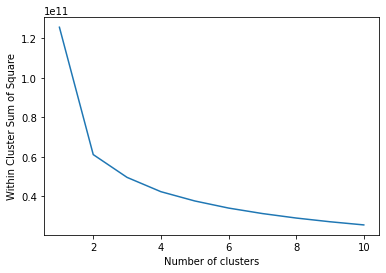

In [284]:
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Square') 
plt.show()

Using the elbow method we can see that the **optimal number of clusters is 2**

## Q5) Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [309]:
k = [2,3, 4, 5]
for K in k :
    model = KMeans (n_clusters= K)
    predicted = model.fit_predict(df)
    score = silhouette_score(df, predicted)
    print ("For k = {}, silhouette score is {}".format(K, score))

For k = 2, silhouette score is 0.46936864138763346
For k = 3, silhouette score is 0.4198535603441116
For k = 4, silhouette score is 0.3260801094769841
For k = 5, silhouette score is 0.3298537037732784


We can see that the optimum number of clusters is 2

In [318]:
km = KMeans(n_clusters=2).fit(df)
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df.index.values
cluster_map['cluster'] = km.labels_

In [332]:
cluster_map.cluster.value_counts()

0    5805
1    3144
Name: cluster, dtype: int64

We can see that there are 5805 samples in 1st cluster and 3144 samples in 2nd cluster